#Clase 3 de la guía de labo

Esto lo hice por ocio. Ahora Oswald dice que miremos la clase 6, ok.
##Ejercicio 13
a)

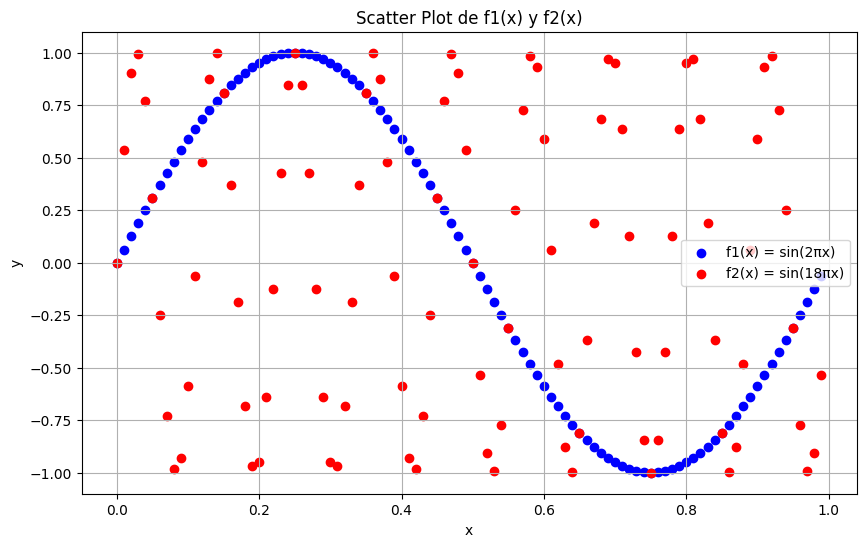

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las funciones f1(x) y f2(x)
def f1(x):
    return np.sin(2 * np.pi * x)

def f2(x):
    return np.sin(18 * np.pi * x)

# Generar una grilla de valores x en el intervalo [0, 1] con un paso de 1
x = np.arange(0, 1, 0.01)  # Paso de 0.01 para mayor resolución en el gráfico

# Calcular los valores de las funciones f1(x) y f2(x) en la grilla de valores x
y1 = f1(x)
y2 = f2(x)

# Crear un scatter plot de los valores de las funciones f1(x) y f2(x)
plt.figure(figsize=(10, 6))
plt.scatter(x, y1, label='f1(x) = sin(2πx)', color='blue')
plt.scatter(x, y2, label='f2(x) = sin(18πx)', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot de f1(x) y f2(x)')
plt.legend()
plt.grid(True)
plt.show()

b)

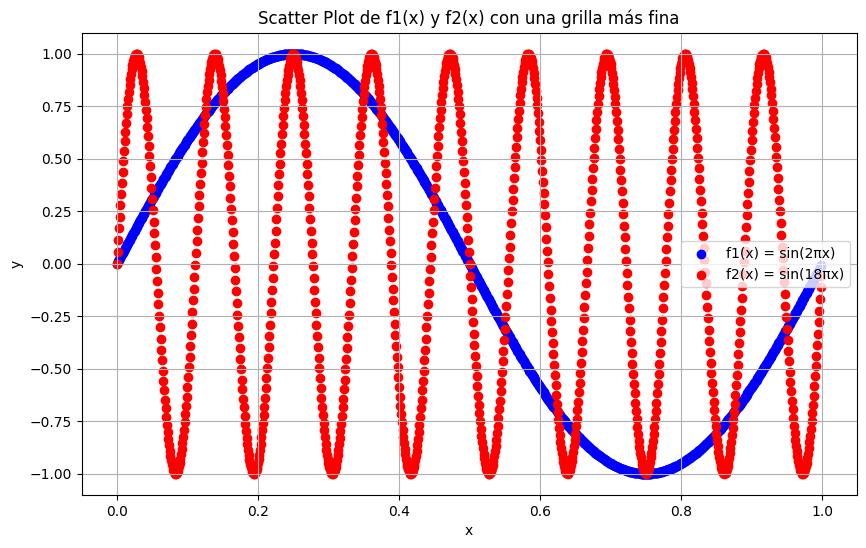

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las funciones f1(x) y f2(x)
def f1(x):
    return np.sin(2 * np.pi * x)

def f2(x):
    return np.sin(18 * np.pi * x)

# Generar una grilla de valores x en el intervalo [0, 1] con un paso más fino
x = np.arange(0, 1, 0.001)  # Paso de 0.001 para una grilla más fina

# Calcular los valores de las funciones f1(x) y f2(x) en la grilla de valores x
y1 = f1(x)
y2 = f2(x)

# Crear un scatter plot de los valores de las funciones f1(x) y f2(x)
plt.figure(figsize=(10, 6))
plt.scatter(x, y1, label='f1(x) = sin(2πx)', color='blue')
plt.scatter(x, y2, label='f2(x) = sin(18πx)', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot de f1(x) y f2(x) con una grilla más fina')
plt.legend()
plt.grid(True)
plt.show()


c) Para entender cómo afectaría el proceso de muestreo con una frecuencia de muestreo de ϕ=8 a señales con diferentes frecuencias, podemos usar el concepto del teorema de muestreo de Nyquist-Shannon, que establece que la frecuencia de muestreo debe ser al menos el doble de la frecuencia máxima presente en la señal para evitar el aliasing.

1. Frecuencias ω_1=1 y ω_2​=9:
    En este caso, la frecuencia más alta (ω2​=9) es más alta que la mitad de la frecuencia de muestreo (ϕ/2=4). Esto significa que la señal de mayor frecuencia no podrá ser capturada adecuadamente, lo que resultará en aliasing. En el gráfico, podrías observar una distorsión en la señal muestreada.

    Frecuencias ω_1=3 y ω_2=19:
    En este caso, ambas frecuencias son más altas que la mitad de la frecuencia de muestreo (ϕ/2=4ϕ/2=4). De nuevo, la señal de frecuencia más alta no podrá ser capturada adecuadamente, lo que resultará en aliasing. Podrías observar una distorsión similar en el gráfico.

    Frecuencias ω1=5ω1​=5 y ω2=−3ω2​=−3:
    La frecuencia negativa (ω2=−3ω2​=−3) no tiene relevancia en el contexto del muestreo. Sin embargo, la frecuencia más alta (ω1=5ω1​=5) es más baja que la mitad de la frecuencia de muestreo (ϕ/2=4ϕ/2=4). En este caso, ambas frecuencias podrían ser capturadas adecuadamente por el proceso de muestreo, sin experimentar aliasing.

En resumen, si las frecuencias de las señales son más altas que la mitad de la frecuencia de muestreo, es probable que ocurra aliasing y la señal muestreada se distorsione. Si las frecuencias son más bajas que la mitad de la frecuencia de muestreo, es menos probable que ocurra aliasing y la señal muestreada podría representar correctamente las frecuencias originales.

##Clase 6
###Ejercicio 24

Lo que mandó Oswald hace una falopiada que sacó de un libro:
https://math.mit.edu/~stevenj/fft-deriv.pdf

Ahora bien, me voy a copiar ese código y voy a usarlo para las funciones del enunciado.

Estamos aproximando derivadas, calculándolas numéricamente.

Notemos primero que al utilizar el método fft así no más, las aproximaciones de las derivadas son malardas.

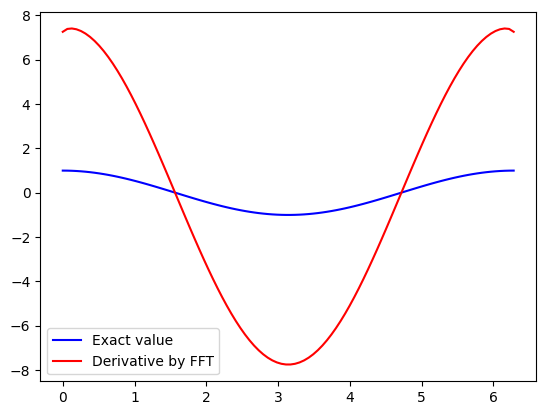

In [ ]:
from scipy.fftpack import fft, ifft, dct, idct, dst, idst, fftshift, fftfreq
from numpy import linspace, zeros, array, pi, sin, cos, exp
import matplotlib.pyplot as plt

N = 100
x = linspace(0,2*pi,N)

dx = x[1]-x[0]
y = sin(x)
dydx = cos(x)

k = fftfreq(N,dx)
k=fftshift(k)

dydx1 = ifft(-k*1j*fft(y)).real

plt.plot(x,dydx,'b',label='Exact value')
plt.plot(x,dydx1,'r',label='Derivative by FFT')
plt.legend()
plt.show()

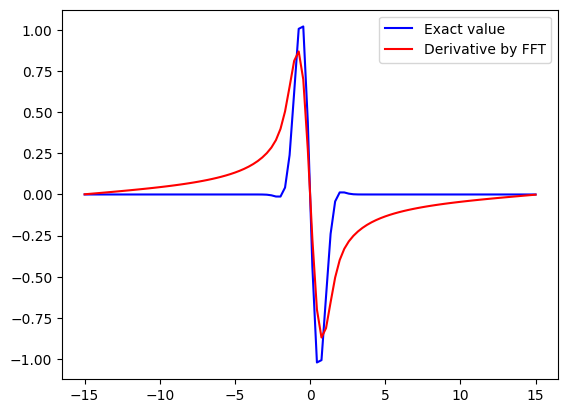

In [ ]:

N = 100
x = linspace(-15,15,N)

dx = x[1]-x[0]
y = cos(x)*np.exp(-x**2)
dydx = -np.exp(-x**2)*np.sin(x)-2*np.exp(-x**2)*x*cos(x)

k = fftfreq(N,dx)
k=fftshift(k)

dydx1 = ifft(-k*1j*fft(y)).real

plt.plot(x,dydx,'b',label='Exact value')
plt.plot(x,dydx1,'r',label='Derivative by FFT')
plt.legend()
plt.show()

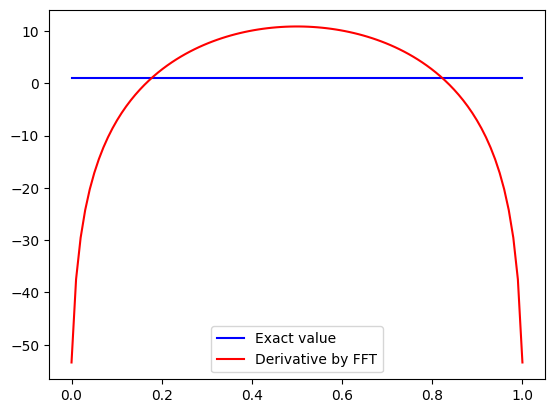

In [ ]:

N = 100
x = linspace(0,1,N)

dx = x[1]-x[0]
y = x
dydx = np.ones(N)

k = fftfreq(N,dx)
k=fftshift(k)

dydx1 = ifft(-k*1j*fft(y)).real

plt.plot(x,dydx,'b',label='Exact value')
plt.plot(x,dydx1,'r',label='Derivative by FFT')
plt.legend()
plt.show()

Ahora aproximamos multiplicando por un factor k2 que sacó Osvalda del link del principio y vemos que mejoran mucho las aproximaciones :)))))))))))))))))))))))))))))

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


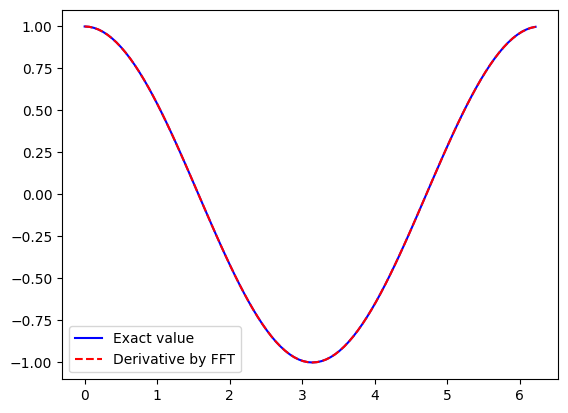

In [ ]:
from numpy import linspace, zeros, array, pi, sin, cos, exp, arange

N = 100
x = 2*pi*arange(0,N,1)/N #-open-periodic domain

dx = x[1]-x[0]
y = sin(x)
dydx = cos(x)


k2=zeros(N)

if ((N%2)==0):
    #-even number
    for i in range(1,N//2):
        k2[i]=i
        k2[N-i]=-i
else:
    #-odd number
    for i in range(1,(N-1)//2):
        k2[i]=i
        k2[N-i]=-i

dydx1 = ifft(1j*k2*fft(y))

plt.plot(x,dydx,'b',label='Exact value')
plt.plot(x,dydx1, color='r', linestyle='--', label='Derivative by FFT')
plt.legend()
plt.show()

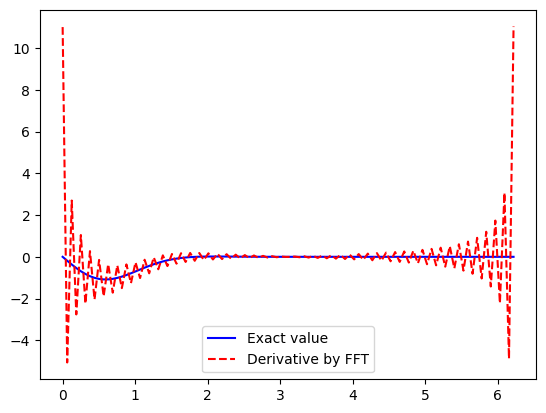

In [ ]:
N = 100
x = 2*pi*arange(0,N,1)/N #-open-periodic domain

dx = x[1]-x[0]
y = cos(x)*np.exp(-x**2)
dydx = -np.exp(-x**2)*np.sin(x)-2*np.exp(-x**2)*x*cos(x)


k2=zeros(N)

if ((N%2)==0):
    #-even number
    for i in range(1,N//2):
        k2[i]=i
        k2[N-i]=-i
else:
    #-odd number
    for i in range(1,(N-1)//2):
        k2[i]=i
        k2[N-i]=-i

dydx1 = ifft(1j*k2*fft(y))

plt.plot(x,dydx,'b',label='Exact value')
plt.plot(x,dydx1, color='r', linestyle='--', label='Derivative by FFT')
plt.legend()
plt.show()

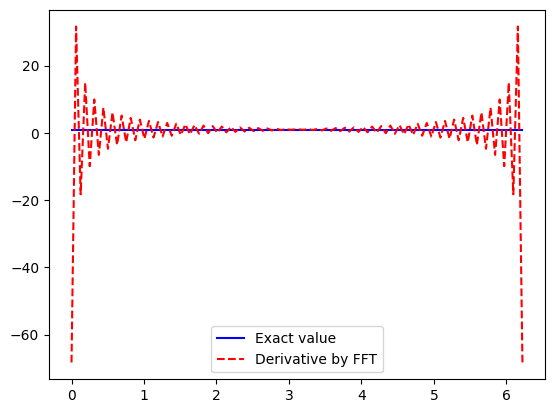

In [ ]:
N = 100
x = 2*pi*arange(0,N,1)/N #-open-periodic domain

dx = x[1]-x[0]
y = x
dydx = np.ones(N)

k2=zeros(N)

if ((N%2)==0):
    #-even number
    for i in range(1,N//2):
        k2[i]=i
        k2[N-i]=-i
else:
    #-odd number
    for i in range(1,(N-1)//2):
        k2[i]=i
        k2[N-i]=-i

dydx1 = ifft(1j*k2*fft(y))

plt.plot(x,dydx,'b',label='Exact value')
plt.plot(x,dydx1, color='r', linestyle='--', label='Derivative by FFT')
plt.legend()
plt.show()

##Ejercicio 25
Medio de lo mismo

In [ ]:
N = 100
x = linspace(0,1,N)

dx = x[1]-x[0]
y = x
dydx = np.ones(N)

k = fftfreq(N,dx)
k=fftshift(k)

dydx1 = ifft(-k*1j*fft(y)).real

plt.plot(x,dydx,'b',label='Exact value')
plt.plot(x,dydx1,'r',label='Derivative by FFT')
plt.legend()
plt.show()

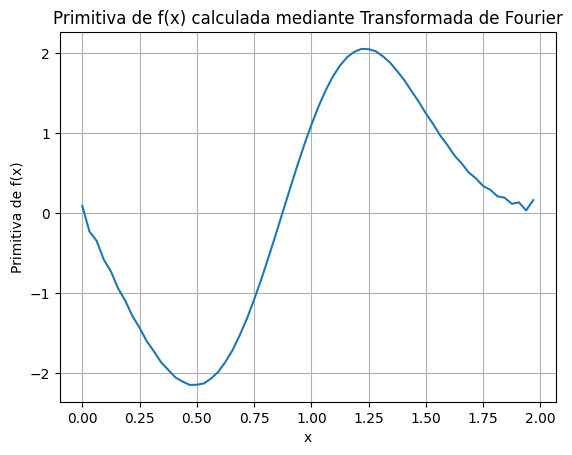

In [ ]:

# Definir la función original
def f(x):
    return -3 * x**2 * np.exp(-x**3)

# Definir el intervalo y el número de puntos
a, b = 0, 2
N = 64
L = b - a
x = np.linspace(a, b, N, endpoint=False)

# Calcular la función f(x) en la grilla
y = f(x)

# Aplicar la Transformada de Fourier discreta (DFT)
Y = fft(y)

# Calcular los valores de frecuencia correspondientes a los índices de la transformada
omega = 2 * np.pi * fftfreq(N, L/N)

# Multiplicar la transformada por i*omega
Y_prima = 1j * omega * Y

# Aplicar la Transformada de Fourier inversa (DFT inversa)
f_prima = ifft(Y_prima).real  # Tomar solo la parte real, la parte imaginaria debería ser cero

# Graficar la primitiva de f(x)
plt.plot(x, f_prima)
plt.xlabel('x')
plt.ylabel("Primitiva de f(x)")
plt.title('Primitiva de f(x) calculada mediante Transformada de Fourier')
plt.grid(True)
plt.show()


Ahora hacemos ejercicios de convolución:

#Clase 5
##Ejercicio 21

In [ ]:
import numpy as np

def convolucion_discreta(v, w):
    # Longitudes de los vectores v y w
    n = len(v)
    m = len(w)

    # Inicializar el vector resultante
    resultado = np.zeros(n + m - 1)

    # Realizar la convolución
    for j in range(n + m - 1):
        suma = 0
        for k in range(max(0, j - m + 1), min(n, j + 1)):
            suma += v[k] * w[j - k]
        resultado[j] = suma

    return resultado

# Ejemplo de uso
v = np.array([1, 2, -1])
w = np.array([3, 1, -5, 2, -1])
resultado = convolucion_discreta(v, w)
print("v * w =", resultado)


v * w = [ 3.  7. -6. -9.  8. -4.  1.]


#Ejercicio 22


In [ ]:
from scipy.fft import fft, ifft

def convolucion_discreta_fft(v, w):
    # Completar ambos vectores con ceros hasta que tengan una longitud total de length(v)+length(w)-1
    n = len(v) + len(w) - 1
    v_padded = np.pad(v, (0, n - len(v)), 'constant')
    w_padded = np.pad(w, (0, n - len(w)), 'constant')

    # Calcular las transformadas de Fourier de v y w
    V = fft(v_padded)
    W = fft(w_padded)

    # Realizar la multiplicación casillero a casillero
    resultado = ifft(V * W).real

    return resultado

# Ejemplo de uso
v = np.array([1, 2, -1])
w = np.array([3, 1, -5, 2, -1])
resultado_fft = convolucion_discreta_fft(v, w)
print("v * w (FFT) =", resultado_fft)


v * w (FFT) = [ 3.  7. -6. -9.  8. -4.  1.]


In [ ]:
import timeit

# Definir v y w para la prueba
v = np.random.rand(1000)
w = np.random.rand(1000)

# Calcular el tiempo de ejecución de la convolución discreta convencional
tiempo_convencion = timeit.timeit(lambda: convolucion_discreta(v, w), number=10)

# Calcular el tiempo de ejecución de la convolución discreta utilizando FFT
tiempo_fft = timeit.timeit(lambda: convolucion_discreta_fft(v, w), number=10)

print("Tiempo de ejecución convolución convencional:", tiempo_convencion)
print("Tiempo de ejecución convolución FFT:", tiempo_fft)


Tiempo de ejecución convolución convencional: 5.166954387999795
Tiempo de ejecución convolución FFT: 0.006761704999007634


Es más rápida la fft.